In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:/Stuff/Handle-Imbalanced-Dataset-master/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
data =df.drop('Class',axis=1)
target =df['Class']

In [7]:
print(data.shape,target.shape)

(284807, 30) (284807,)


Text(0.5, 1.0, 'Class Distribution')

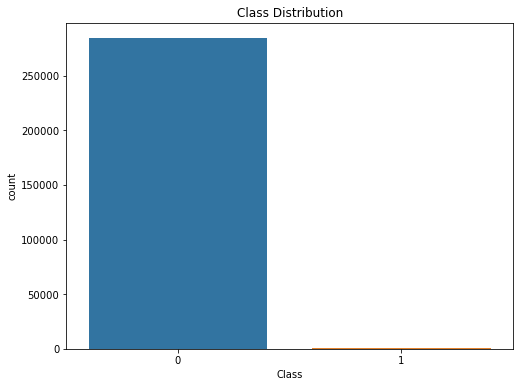

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(df['Class']);
plt.title('Class Distribution')

In [9]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]

In [10]:
print('Normal Transaction :{}\nFraud Transction :{}'.format(normal.shape,fraud.shape))

Normal Transaction :(284315, 31)
Fraud Transction :(492, 31)


### Under Sampling

In [11]:
from imblearn.under_sampling import NearMiss

In [17]:
nm =NearMiss()
X,Y=nm.fit_sample(data,target)

In [18]:
X.shape,Y.shape

((984, 30), (984,))

In [19]:
from collections import Counter

In [20]:
print('Original dataset shape Counter :{}\nResampled dataset shape Counter :{}'.format(Counter(target),Counter(Y)))

Original dataset shape Counter :Counter({0: 284315, 1: 492})
Resampled dataset shape Counter :Counter({0: 492, 1: 492})


### Over Sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros =RandomOverSampler(sampling_strategy=1.0,random_state=42)
x_res,y_res=ros.fit_sample(data,target)

In [28]:
x_res.shape,y_res.shape

((568630, 30), (568630,))

In [29]:
print('Original dataset shape Counter :{}\nResampled dataset shape Counter :{}'.format(Counter(target),Counter(y_res)))

Original dataset shape Counter :Counter({0: 284315, 1: 492})
Resampled dataset shape Counter :Counter({0: 284315, 1: 284315})
